## <font color=yellow>1. auth</font>

In [6]:
from openai import AzureOpenAI
from openai._exceptions import RateLimitError, APITimeoutError, OpenAIError

import os
import yaml

def get_auth():
    # curr_dir = os.getcwd()
    auth_path = r'.\ms_azure\auth.yml'
    auth = yaml.safe_load(open(auth_path, encoding='utf-8'))
    return auth

In [ ]:
def get_auth():
    curr_dir = os.getcwd()
    auth_path = os.path.join(curr_dir, 'ms_azure', 'auth.yml')
    auth = yaml.safe_load(open(auth_path, encoding='utf-8'))
    return auth

auth = get_auth()
endpoint = f"https://{auth['Azure_OpenAI']['name']}.cognitiveservices.azure.com/"
model_name = "gpt-4o"
deployment = "gpt-4o"

subscription_key = auth['Azure_OpenAI']['key']
api_version = "2024-12-01-preview"

client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=endpoint,
    api_key=subscription_key,
)

system_message = "You are an AI assistant that helps people find information."
query = "안녕, 넌 코드 작성할 수 있어?"

messages = [{"role":"system", "content":f"{system_message}"}]
messages.append({"role":"user", "content":f"{query}"})

try:
    response = client.chat.completions.create(
        model=deployment,
        messages=messages,
        temperature=0.7,
    ).choices[0].message.content
except RateLimitError:
    print("OpenAI API RateLimitError occurred!")
except APITimeoutError:
    print("OpenAI API Timeout occurred!")
except OpenAIError as e:
    print(f"기타 OpenAI API 오류: {e}")

print(response)

안녕하세요! 네, 저는 코드를 작성하는 데 도움을 줄 수 있습니다. 어떤 종류의 코드를 작성하고 싶으신가요? 어떤 프로그래밍 언어를 사용하고 계신가요?


In [7]:
def get_auth():
    curr_dir = os.getcwd()
    auth_path = os.path.join(curr_dir, r'ms_azure','prompt.yml')
    auth = yaml.safe_load(open(auth_path, encoding='utf-8'))
    return auth

auth = get_auth()
auth

{'image_to_text_prompt': [{'system_message': 'Please extract all information from the provided image and convert it to text format. \nEnsure that all elements, including tables, formulas, and any other details, are accurately represented in text. \nMaintain the structure and format of the original content as closely as possible.\n'}],
 'rag_generate_prompt': [{'system_message': 'You are a korea data-generating robot. \nBased on the given content, you need to generate multiple question-and-answer pairs.\nIf a table is drawn, you must write down all the information, including your interpretation of the table. \nBe sure to record all information thoroughly.\nThis will be used as training data for an LLM, so never create ambiguous questions or ambiguous answers.\nMake sure to generate responses that are between 1 to 3 sentences long.\n'},
  {'user_message': "context : 2023년 10월 1일, 서울에서 대규모 환경 보호 시위가 열렸습니다. 수천 명의 시민들이 참여하여 기후 변화와 환경 오염에 대한 긴급한 대응을 촉구했습니다. 이 시위는 전 세계적으로 동시다발적으로 이루어진 '기후 행동의

## <font color=yellow>2. pdf로부터 데이터 생성</font>

In [1]:
from PyPDF2 import PdfReader

reader = PdfReader(r'.\패스트캠퍼스 기업교육 소개서.pdf')

pdf_lists = []
for page in reader.pages:
    text = page.extract_text()
    pdf_lists.append(text)

In [2]:
pdf_lists[27]

'27\n2019 Fast campus Corporate Education 03 세미나 및 네트워킹\n2018 \nFuture \nConference .\n─\nBlockchain · UXUI Design\nArtificial Intelligence \nEntrepreneurshio\nReal Estate  분야 \n최고의 경험에서 미래를 배운다.\n─\n일정 : 2018년 9월 28일 \n참석인원 : 약 3,000명 Blockchain\n: Technology Issues\nThe Future ofCreative\n: UX/UI Design Trends\nThe Future of Entrepreneurship\n: Bold MoveArtificial Intelligence\n: AI Implications\nThe Future of Real Estate\n: Value Creation\n1. 블록체인을 통한 글로벌 탑티어 팀의 문제 해결 접근법\n2. 엑셀러레이터가 바라보는 블록체인 산업의 문제점과 개선방안\n3. 스마트 컨트랙트 해킹 사건 및 안전한 개발 방법\n4. EVM Compatible Gas Delegated Transaction Execution Model\n5. NFT(Non-Fungible Token) 기반의 블록체인 서비스 구축\n6. Blockchain for Entrepreneurs : Proof of Market\n7. 공유경제에서 블록체인 기술\n1. 구글의  VISUAL DESIGNER 가 이야기하는 : 디자인의 경계와 테크놀로지\n2. 구글의 UX MANAGER 가 이야기하는 : 수동적인 서비스에서 능동적인 파트너로\n3. 네이버의 UX LEAD 가 이야기하는 : 사용자 조사 없이 하는 UX 디자인\n4. 마이크로소프트 INTERACTION DESIGNER 가 이야기하는 : AI 시대의 디자인의 역할\n5. 듀오톤 대표가 이야기하는 : Why we need design systems ?\n6. 인스타그램 PRODUCT DESIGN

In [3]:
from ms_azure.gpt_rag import RAG

rag = RAG()

response = rag._generate(
    context=pdf_lists[27]
)

In [4]:
print("response:", response)
print("type:", type(response))

response: {
  "qa_pairs": [
    {
      "question": "2018년 행사의 날짜는 언제였나요?",
      "answer": "2018년 9월 28일이었습니다."
    },
    {
      "question": "2018년 행사에서 다룬 주요 주제들을 나열해주세요.",
      "answer": "블록체인, UX/UI 디자인, 인공지능, 기업가정신, 부동산 등의 주제가 다루어졌습니다."
    },
    {
      "question": "2018년 행사의 참석 인원은 몇 명이었나요?",
      "answer": "약 3,000명이 참석했습니다."
    },
    {
      "question": "행사에서 블록체인 기술과 관련하여 어떤 내용이 다루어졌나요?",
      "answer": "블록체인을 통한 글로벌 탑티어 팀의 문제 해결 접근법, 엑셀러레이터가 바라보는 블록체인 산업의 문제점과 개선방안, 스마트 컨트랙트 해킹 사건 및 안전한 개발 방법 등이 다루어졌습니다."
    },
    {
      "question": "UX/UI 디자인에 대해 어떤 주제들이 토론되었나요?",
      "answer": "디자인의 경계와 테크놀로지, 수동적인 서비스에서 능동적인 파트너로의 전환, 사용자 조사 없이 하는 UX 디자인, AI 시대의 디자인 역할 등이 토론되었습니다."
    },
    {
      "question": "인공지능과 관련하여 어떤 주제가 다루어졌나요?",
      "answer": "인공지능의 eCommerce, 로보틱스, 음성 합성, 엔터테인먼트, 스포츠 분야에서의 의미와 영향 등이 다루어졌습니다."
    },
    {
      "question": "부동산 분야에서는 어떤 주제가 다루어졌나요?",
      "answer": "부동산 개발을 통한 가치창출 사례 연구, 재개발 투자의 과거, 현재 그리고 미래, 공유 오피스 사업 개발과 트렌드, 공유 숙박 트렌드 등이 

In [5]:
import json
json.loads(response)

{'qa_pairs': [{'question': '2018년 행사의 날짜는 언제였나요?',
   'answer': '2018년 9월 28일이었습니다.'},
  {'question': '2018년 행사에서 다룬 주요 주제들을 나열해주세요.',
   'answer': '블록체인, UX/UI 디자인, 인공지능, 기업가정신, 부동산 등의 주제가 다루어졌습니다.'},
  {'question': '2018년 행사의 참석 인원은 몇 명이었나요?', 'answer': '약 3,000명이 참석했습니다.'},
  {'question': '행사에서 블록체인 기술과 관련하여 어떤 내용이 다루어졌나요?',
   'answer': '블록체인을 통한 글로벌 탑티어 팀의 문제 해결 접근법, 엑셀러레이터가 바라보는 블록체인 산업의 문제점과 개선방안, 스마트 컨트랙트 해킹 사건 및 안전한 개발 방법 등이 다루어졌습니다.'},
  {'question': 'UX/UI 디자인에 대해 어떤 주제들이 토론되었나요?',
   'answer': '디자인의 경계와 테크놀로지, 수동적인 서비스에서 능동적인 파트너로의 전환, 사용자 조사 없이 하는 UX 디자인, AI 시대의 디자인 역할 등이 토론되었습니다.'},
  {'question': '인공지능과 관련하여 어떤 주제가 다루어졌나요?',
   'answer': '인공지능의 eCommerce, 로보틱스, 음성 합성, 엔터테인먼트, 스포츠 분야에서의 의미와 영향 등이 다루어졌습니다.'},
  {'question': '부동산 분야에서는 어떤 주제가 다루어졌나요?',
   'answer': '부동산 개발을 통한 가치창출 사례 연구, 재개발 투자의 과거, 현재 그리고 미래, 공유 오피스 사업 개발과 트렌드, 공유 숙박 트렌드 등이 다루어졌습니다.'}]}

## <font color=yellow>3. 이미지 데이터 생성</font>

In [1]:
from pdf2image import convert_from_path

pdf_path = r'.\한국의안전보고서2023(펼침면).pdf'

images = convert_from_path(pdf_path)

for i, image in enumerate(images):
    image.save(r'.\pdf_image\한국의안전보고서2023(펼침면)_page_{}.png'.format(i), 'PNG')

<font color=red>encode image to data URL</font>

Data URL: 

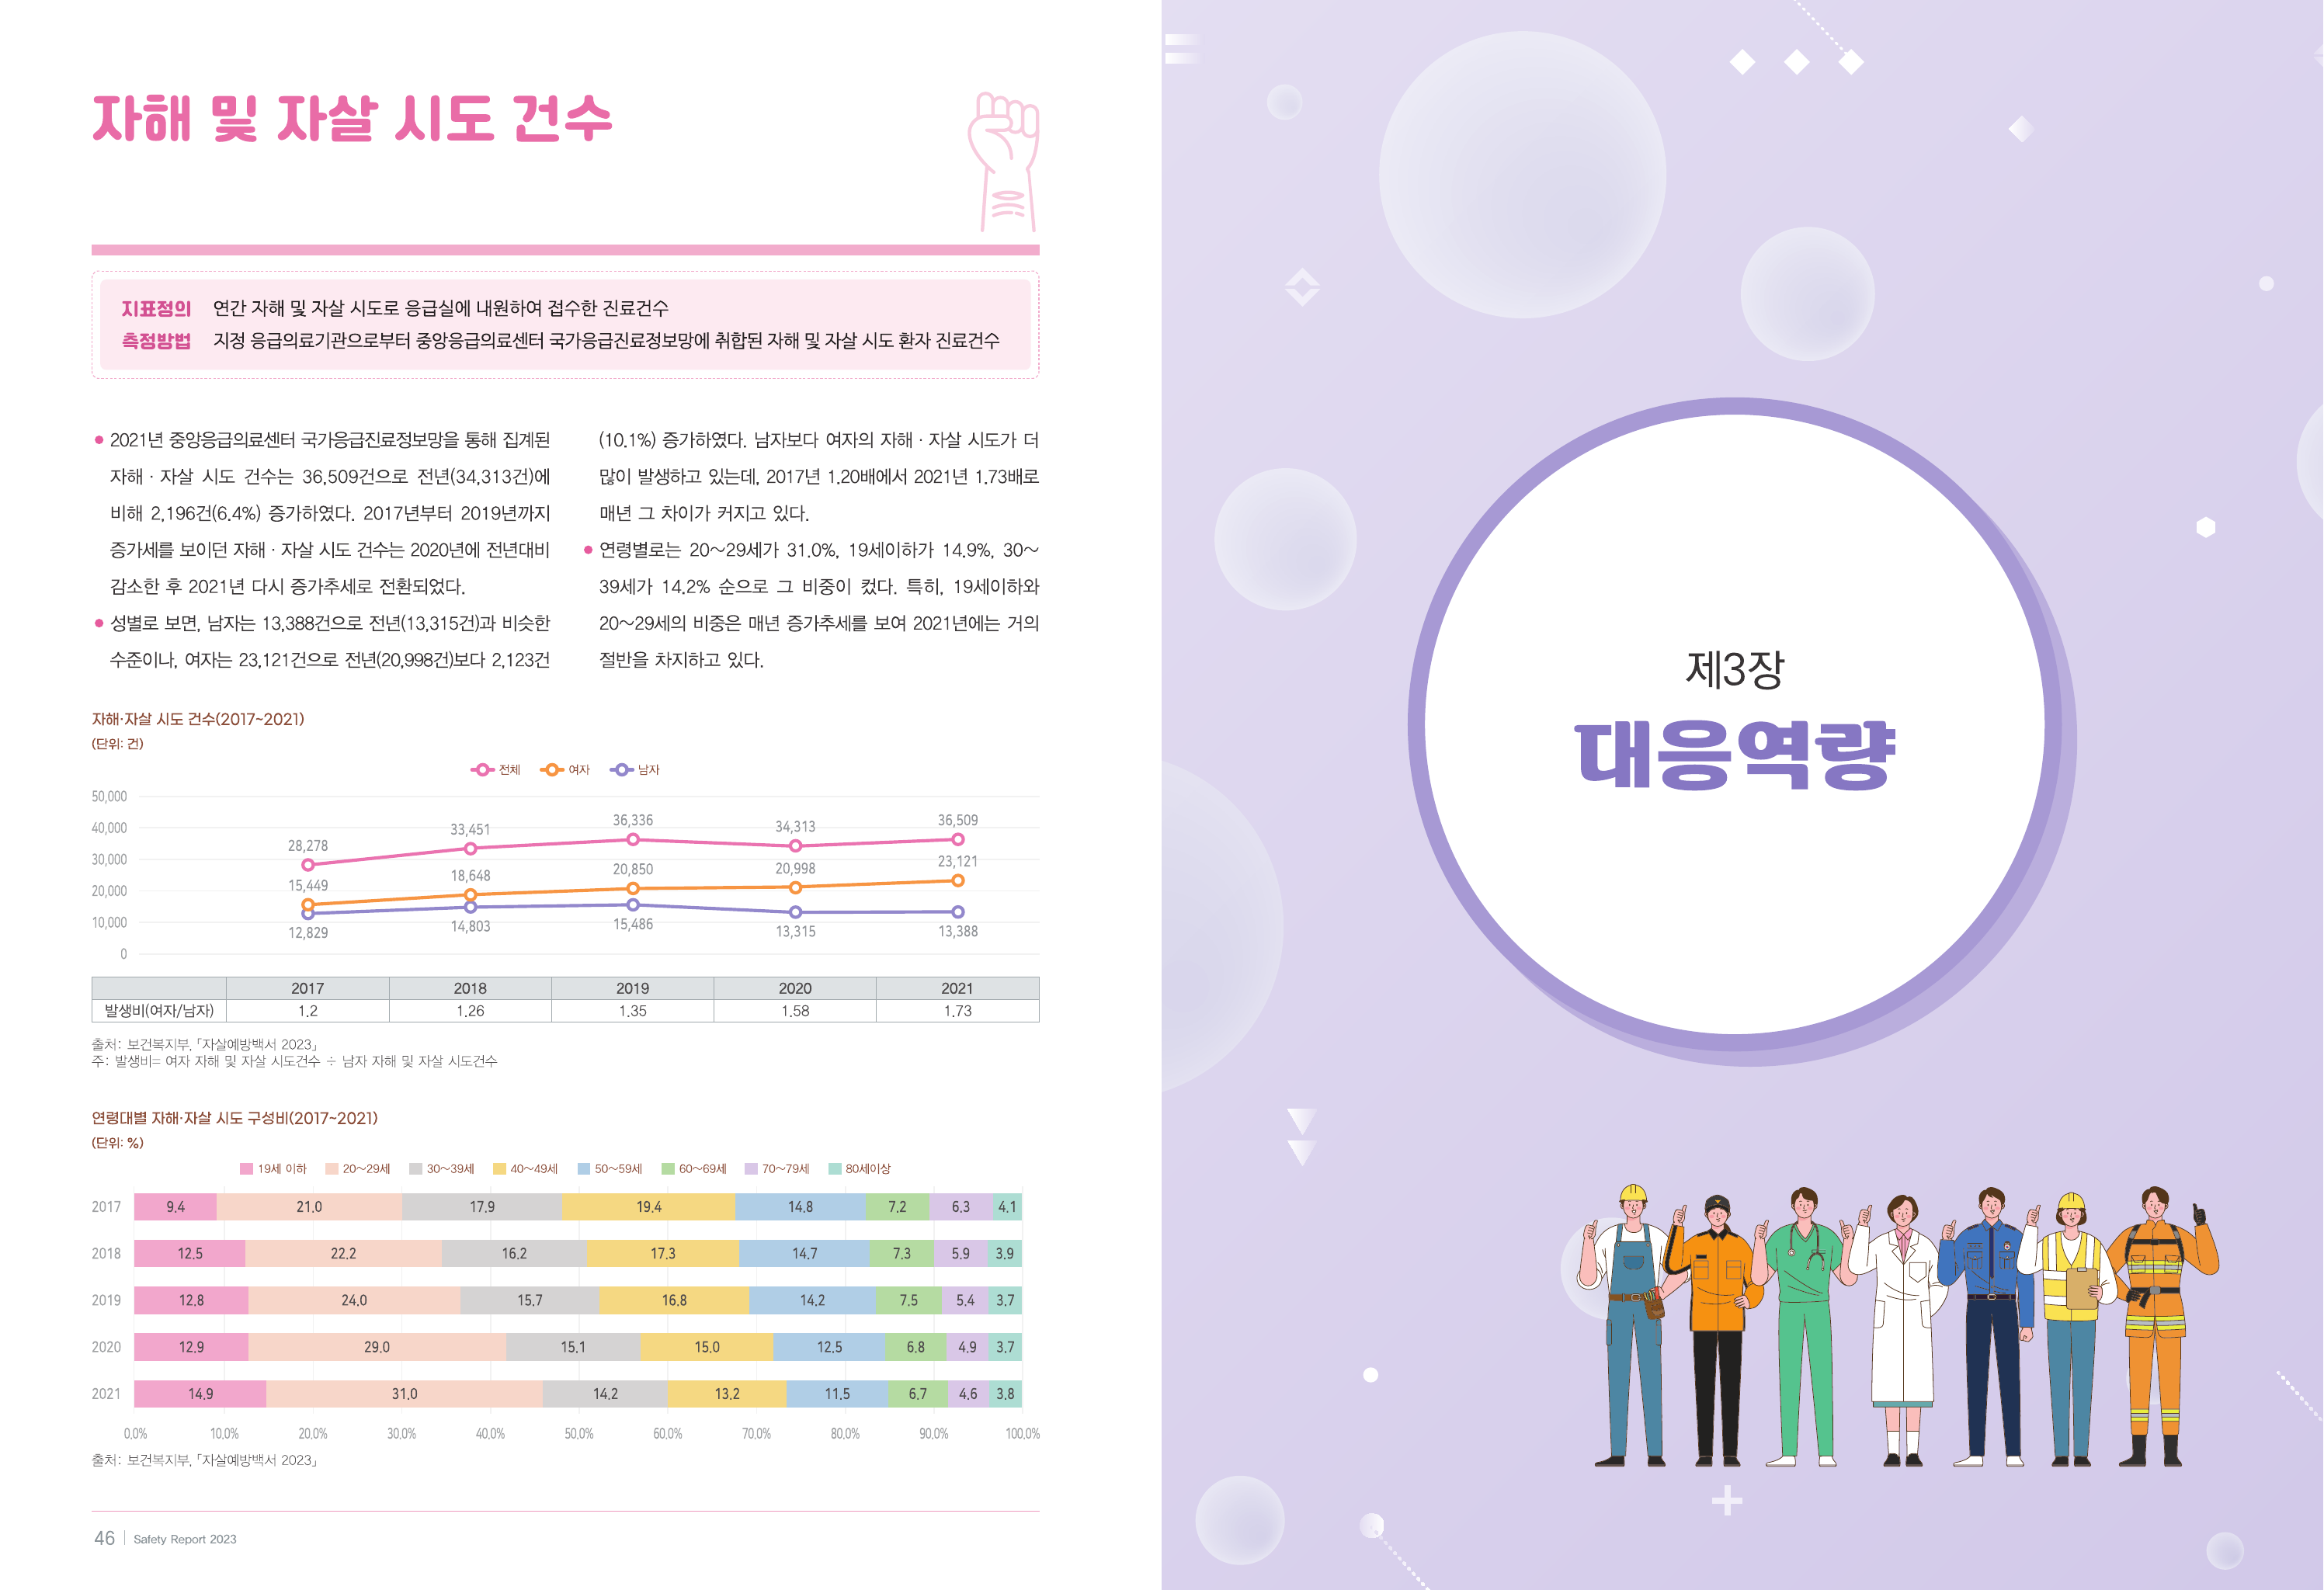

In [1]:
import base64
from mimetypes import guess_type

# Function to encode a local image into data URL
def local_image_to_data_url(image_path):
    # Guess the MIME type of the image based on the file extension
    mime_type, _ = guess_type(image_path)
    if mime_type is None:
        mime_type = 'application/octet-stream'  # Default MIME type if none is found

    # Read and encode the image file
    with open(image_path, "rb") as image_file:
        base64_encoded_data = base64.b64encode(image_file.read()).decode('utf-8')

    # Construct the data URL
    return f"data:{mime_type};base64,{base64_encoded_data}"

# Example usage
image_path = r'.\pdf_image\한국의안전보고서2023(펼침면)_page_24.png'
data_url = local_image_to_data_url(image_path)
print("Data URL:", data_url)

In [2]:
from ms_azure.extract_context import Extract_Context

ec = Extract_Context()
response = ec._generate(
    img_url=data_url
)

In [3]:
response

'### 자해 및 자살 시도 건수  \n\n#### 지표정의  \n약간 자해 및 자살 시도로 응급실에 내원하여 접수한 진료건수  \n\n#### 측정방법  \n지정 응급의료기관으로부터 중앙응급의료센터 국가응급진료정보망에 취합된 자해 및 자살 시도 환자 진료건수  \n\n---\n\n- **2021년** 중앙응급의료센터 국가응급진료정보망을 통해 집계된 자해·자살 시도 건수는 **36,509건**으로 전년(34,313건)에 비해 **2,196건(6.4%) 증가**하였다. 2017년부터 2019년까지 증가세를 보이던 자해·자살 시도 건수는 2020년에 전년대비 감소한 후 **2021년 다시 증가세로 전환**되었다.  \n\n- **성별**로 보면 남자는 **13,388건**으로 전년(13,315건)과 비슷한 수준이나, 여자는 **23,121건**으로 전년(20,998건)보다 **2,123건(11.1%) 증가**하였다. 남자보다 여자의 자해·자살 시도가 더 많이 발생하고 있는데 2017년 1.20배에서 2021년 **1.73배로 그 차이가 커지고 있다.**  \n\n- **연령별**로는 **20~29세가 31.0%, 19세 이하가 14.9%, 30~39세가 14.2%** 순으로 그 비중이 크다. 특히, **19세 이하와 20~29세의 비중은 매년 증가세를 보여 2021년에는 거의 절반을 차지**하고 있다.  \n\n---\n\n#### 자해·자살 시도 건수(2017~2021)  \n\n(단위: 건)\n\n| 연도  | 합계   | 남자   | 여자   |\n|-------|--------|--------|--------|\n| 2017  | 28,278 | 12,486 | 15,792 |\n| 2018  | 31,045 | 13,606 | 17,439 |\n| 2019  | 34,313 | 13,850 | 20,498 |\n| 2020  | 33,315 | 13,315 | 20,000 |\n| 2021  | 36,509 | 13,388 | 23,121 |\n\n---

<font color=red>이미지로 추출한 정보를 바탕으로 dataset 생성</font>

In [5]:
from ms_azure.gpt_rag import RAG

rag = RAG()
response = rag._generate(
    context=response
)

In [6]:
import json
json.loads(response)

{'qa_pairs': [{'question': '2021년 자해·자살 시도 건수는 몇 건인가요?',
   'answer': '2021년 자해·자살 시도 건수는 36,509건입니다.'},
  {'question': '2021년 자해·자살 시도 건수가 전년 대비 얼마나 증가했나요?',
   'answer': '2021년 자해·자살 시도 건수는 전년 대비 2,196건(6.4%) 증가했습니다.'},
  {'question': '2017년부터 2021년까지 자해·자살 시도 건수는 어떤 추세를 보였나요?',
   'answer': '2017년부터 2019년까지 증가세를 보이다가 2020년에 감소한 후 2021년에 다시 증가세로 전환되었습니다.'},
  {'question': '2021년 성별 자해·자살 시도 건수는 어떻게 나타났나요?',
   'answer': '2021년 남자는 13,388건으로 전년과 비슷한 수준이었고, 여자는 23,121건으로 전년 대비 2,123건(11.1%) 증가했습니다.'},
  {'question': '2017년과 2021년 사이 남녀 간 자해·자살 시도 비율 차이는 어떻게 변화했나요?',
   'answer': '2017년에는 여자가 남자보다 1.20배 많았으나, 2021년에는 그 차이가 1.73배로 커졌습니다.'},
  {'question': '2021년 연령별 자해·자살 시도 비중이 가장 높은 연령대는 무엇인가요?',
   'answer': '2021년 연령별 자해·자살 시도 비중이 가장 높은 연령대는 20~29세로 31.0%를 차지했습니다.'},
  {'question': '2021년 연령별 자해·자살 시도에서 19세 이하와 20~29세가 차지하는 비중은 어떻게 나타났나요?',
   'answer': '2021년 19세 이하와 20~29세는 각각 14.9%와 31.0%를 차지하며, 거의 절반에 해당하는 비중을 기록했습니다.'},
  {'question': '2017년부터 2021년까지 연령별 자해·자살 시도 비중에서 19세 이하와 2